In [4]:
#Yueyang Shen EECS 476 Winter 2020
#In this notebook, we imported a 300*300 disease similarity matrix index
# (file lap_matrix_300.csv) and the other file are the indexes of the diseases
#(file disease_index.csv) and output the filtered Louvain algorithm based clustering.


import numpy as np
#we know that the disease similarity matrix is 300*300


disease = []
with open('disease_index.csv', 'r', encoding='utf-8') as f:
    for line in f:
        line_arr = line.split(',')
        disease.append(line_arr[1])
        
    f.close()

similarity_matrix = np.zeros((300,300))
row = 0

with open('lap_matrix_300.csv', 'r', encoding='utf-8') as f:
    for line in f:
        line_arr = line.split(',')
        for column in range(300):
            similarity_matrix[row,column] = line_arr[column]
        row += 1
    f.close()    



In [5]:
#retrieve the similarity mean and cut off
mean = np.mean(similarity_matrix)
print("The mean is", mean, "We therefore cutoff at 0.3")

The mean is 0.2822605203182166 We therefore cutoff at 0.3


{'Renal Insufficiency\n': 0, 'Diabetic Nephropathies\n': 0, 'Torsades de Pointes\n': 1, 'Azotemia\n': 1, '"Hearing Loss\n': 2, 'Nausea\n': 1, 'Acute Coronary Syndrome\n': 3, '"Leishmaniasis\n': 3, 'Headache\n': 1, 'Diabetic Cardiomyopathies\n': 0, 'Hepatic Encephalopathy\n': 1, 'Arteriosclerosis\n': 1, 'Sarcoidosis\n': 3, '"Sarcoma\n': 1, '"Blindness\n': 1, '"Ophthalmoplegia\n': 3, 'Vision Disorders\n': 1, 'Sarcoma\n': 0, 'Myocarditis\n': 2, 'Oral Ulcer\n': 1, 'Retinal Diseases\n': 0, 'Urticaria\n': 3, '"Pregnancy Complications\n': 3, 'Pneumonia\n': 0, '"Nephritis\n': 1, 'Thrombocytopenia\n': 1, 'Hallucinations\n': 1, 'Endomyocardial Fibrosis\n': 2, '"Dermatitis\n': 0, 'Nephrotic Syndrome\n': 1, 'Anemia\n': 0, 'Neural Tube Defects\n': 0, 'Glomerulonephritis\n': 0, 'Heat Stroke\n': 3, 'Myasthenia Gravis\n': 1, 'Cardiovascular Abnormalities\n': 0, 'Stomach Diseases\n': 1, 'Hyperuricemia\n': 2, 'Uveitis\n': 1, 'Cystitis\n': 1, 'Crohn Disease\n': 3, 'Lung Diseases\n': 0, 'Pruritus\n': 1, '

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

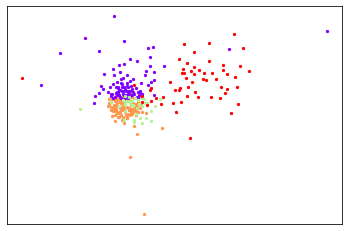

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig = plt.gcf()
#apply Louvain
#Tanimoto coefficient with 0.5 cutoff
G2 = nx.Graph()

for i in range(len(disease)):
    G2.add_node(disease[i])
for i in range(len(disease)):
    for j in range(i,len(disease)):
        if similarity_matrix [i,j]>0.3:
            G2.add_edge(disease[i],disease[j])
#apply louvain algorithm to detect communities
import community as community_louvain
partition = community_louvain.best_partition(G2)
print(partition)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G2)
count = 0.
#colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
#m for purple
#number of cluster number
color_set = set()
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    color_set.add(len(list_nodes))
#draw a rainbow
colors = cm.rainbow(np.linspace(0, 1, len(color_set)))
#the size of the colorset
print(color_set)
color_list = list(color_set)
count = 0.
cluster_list = []
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    cluster_list.append(list_nodes)
    for i in range(len(color_list)):
        if(color_list[i]==len(list_nodes)) and len(list_nodes)>2:
            nx.draw_networkx_nodes(G2, pos, list_nodes, node_size = 5,node_color = colors[i])
print("Number of clusters",count)
#nx.draw_networkx_edges(G2, pos, alpha=0.5)
plt.show()
fig.savefig("Louvain_disease")
